In [352]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow as pa

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('pyarrow version:', pa.__version__)


numpy version: 1.20.3
pandas version: 1.3.4
seaborn version: 0.11.2
pyarrow version: 7.0.0


Loading both a single parquet file and all files into dataframes for examination.

In [391]:
import glob

# Local path to the dataset files: roadworks folder contains the parquets in this case
localpath = '/Stuff/School/SOFT/FHICT-S4-AI/Group/ANWB/roadworks'
isFirstRun = True
filesRead = 0
for path in glob.glob(f"{localpath}/*"):
#   Setting the relative path: this notebook is in the same directory as the roadworks folder that contains the parquets 
    path = path.replace(f"{localpath}\\", "roadworks/")
    if (path == 'roadworks/_SUCCESS'):
        continue
    else:
        filesRead += 1
        print(f"files read: \033[1m {filesRead}\033[0m")
        if (isFirstRun):
            bdf = pd.read_parquet(path)
            isFirstRun = False
        else:
            bdf = bdf.append(pd.read_parquet(path))

sdf = pd.read_parquet("roadworks/part-00000-6d331a6a-a08a-4cfc-ad2c-d184f64be97e-c000.snappy.parquet")

pd.set_option('display.max_columns', None)

files read:  1
files read:  2
files read:  3
files read:  4
files read:  5
files read:  6
files read:  7
files read:  8
files read:  9
files read:  10
files read:  11
files read:  12
files read:  13
files read:  14
files read:  15
files read:  16
files read:  17
files read:  18
files read:  19
files read:  20
files read:  21
files read:  22
files read:  23
files read:  24
files read:  25
files read:  26
files read:  27
files read:  28
files read:  29
files read:  30
files read:  31
files read:  32
files read:  33
files read:  34
files read:  35
files read:  36
files read:  37
files read:  38
files read:  39
files read:  40
files read:  41
files read:  42
files read:  43
files read:  44
files read:  45
files read:  46
files read:  47
files read:  48
files read:  49
files read:  50
files read:  51
files read:  52
files read:  53
files read:  54
files read:  55
files read:  56
files read:  57
files read:  58
files read:  59
files read:  60
files read:  61
files read:  62
files read:  63
f

files read:  336
files read:  337
files read:  338
files read:  339
files read:  340
files read:  341
files read:  342
files read:  343
files read:  344
files read:  345
files read:  346
files read:  347
files read:  348
files read:  349
files read:  350
files read:  351
files read:  352
files read:  353
files read:  354
files read:  355
files read:  356
files read:  357
files read:  358
files read:  359
files read:  360
files read:  361
files read:  362
files read:  363
files read:  364
files read:  365
files read:  366
files read:  367
files read:  368
files read:  369
files read:  370
files read:  371
files read:  372
files read:  373
files read:  374
files read:  375
files read:  376
files read:  377
files read:  378
files read:  379
files read:  380
files read:  381
files read:  382
files read:  383
files read:  384
files read:  385
files read:  386
files read:  387
files read:  388
files read:  389
files read:  390
files read:  391
files read:  392
files read:  393
files read:  3

files read:  665
files read:  666
files read:  667
files read:  668
files read:  669
files read:  670
files read:  671
files read:  672
files read:  673
files read:  674
files read:  675
files read:  676
files read:  677
files read:  678
files read:  679
files read:  680
files read:  681
files read:  682
files read:  683
files read:  684
files read:  685
files read:  686
files read:  687
files read:  688
files read:  689
files read:  690
files read:  691
files read:  692
files read:  693
files read:  694
files read:  695
files read:  696
files read:  697
files read:  698
files read:  699
files read:  700
files read:  701
files read:  702
files read:  703
files read:  704
files read:  705
files read:  706
files read:  707
files read:  708
files read:  709
files read:  710
files read:  711
files read:  712
files read:  713
files read:  714
files read:  715
files read:  716
files read:  717
files read:  718
files read:  719
files read:  720
files read:  721
files read:  722
files read:  7

files read:  993
files read:  994
files read:  995
files read:  996
files read:  997
files read:  998
files read:  999
files read:  1000
files read:  1001
files read:  1002
files read:  1003
files read:  1004
files read:  1005
files read:  1006
files read:  1007
files read:  1008
files read:  1009
files read:  1010
files read:  1011
files read:  1012
files read:  1013
files read:  1014
files read:  1015
files read:  1016
files read:  1017
files read:  1018
files read:  1019
files read:  1020
files read:  1021
files read:  1022
files read:  1023
files read:  1024
files read:  1025
files read:  1026
files read:  1027
files read:  1028
files read:  1029
files read:  1030
files read:  1031
files read:  1032
files read:  1033
files read:  1034
files read:  1035
files read:  1036
files read:  1037
files read:  1038
files read:  1039
files read:  1040
files read:  1041
files read:  1042
files read:  1043
files read:  1044
files read:  1045
files read:  1046
files read:  1047
files read:  1048

files read:  1309
files read:  1310
files read:  1311
files read:  1312
files read:  1313
files read:  1314
files read:  1315
files read:  1316
files read:  1317
files read:  1318
files read:  1319
files read:  1320
files read:  1321
files read:  1322
files read:  1323
files read:  1324
files read:  1325
files read:  1326
files read:  1327
files read:  1328
files read:  1329
files read:  1330
files read:  1331
files read:  1332
files read:  1333
files read:  1334
files read:  1335
files read:  1336
files read:  1337
files read:  1338
files read:  1339
files read:  1340
files read:  1341
files read:  1342
files read:  1343
files read:  1344
files read:  1345
files read:  1346
files read:  1347
files read:  1348
files read:  1349
files read:  1350
files read:  1351
files read:  1352
files read:  1353
files read:  1354
files read:  1355
files read:  1356
files read:  1357
files read:  1358
files read:  1359
files read:  1360
files read:  1361
files read:  1362
files read:  1363
files read

files read:  1625
files read:  1626
files read:  1627
files read:  1628
files read:  1629
files read:  1630
files read:  1631
files read:  1632
files read:  1633
files read:  1634
files read:  1635
files read:  1636
files read:  1637
files read:  1638
files read:  1639
files read:  1640
files read:  1641
files read:  1642
files read:  1643
files read:  1644
files read:  1645
files read:  1646
files read:  1647
files read:  1648
files read:  1649
files read:  1650
files read:  1651
files read:  1652
files read:  1653
files read:  1654
files read:  1655
files read:  1656
files read:  1657
files read:  1658
files read:  1659
files read:  1660
files read:  1661
files read:  1662
files read:  1663
files read:  1664
files read:  1665
files read:  1666
files read:  1667
files read:  1668
files read:  1669
files read:  1670
files read:  1671
files read:  1672
files read:  1673
files read:  1674
files read:  1675
files read:  1676
files read:  1677
files read:  1678
files read:  1679
files read

files read:  1941
files read:  1942
files read:  1943
files read:  1944
files read:  1945
files read:  1946
files read:  1947
files read:  1948
files read:  1949
files read:  1950
files read:  1951
files read:  1952
files read:  1953
files read:  1954
files read:  1955
files read:  1956
files read:  1957
files read:  1958
files read:  1959
files read:  1960
files read:  1961
files read:  1962
files read:  1963
files read:  1964
files read:  1965
files read:  1966
files read:  1967
files read:  1968
files read:  1969
files read:  1970
files read:  1971
files read:  1972
files read:  1973
files read:  1974
files read:  1975
files read:  1976
files read:  1977
files read:  1978
files read:  1979
files read:  1980
files read:  1981
files read:  1982
files read:  1983
files read:  1984
files read:  1985
files read:  1986
files read:  1987
files read:  1988
files read:  1989
files read:  1990
files read:  1991
files read:  1992
files read:  1993
files read:  1994
files read:  1995
files read

files read:  2257
files read:  2258
files read:  2259
files read:  2260
files read:  2261
files read:  2262
files read:  2263
files read:  2264
files read:  2265
files read:  2266
files read:  2267
files read:  2268
files read:  2269
files read:  2270
files read:  2271
files read:  2272
files read:  2273
files read:  2274
files read:  2275
files read:  2276
files read:  2277
files read:  2278
files read:  2279
files read:  2280
files read:  2281
files read:  2282
files read:  2283
files read:  2284
files read:  2285
files read:  2286
files read:  2287
files read:  2288
files read:  2289
files read:  2290
files read:  2291
files read:  2292
files read:  2293
files read:  2294
files read:  2295
files read:  2296
files read:  2297
files read:  2298
files read:  2299
files read:  2300
files read:  2301
files read:  2302
files read:  2303
files read:  2304
files read:  2305
files read:  2306
files read:  2307
files read:  2308
files read:  2309
files read:  2310
files read:  2311
files read

files read:  2573
files read:  2574
files read:  2575
files read:  2576
files read:  2577
files read:  2578
files read:  2579
files read:  2580
files read:  2581
files read:  2582
files read:  2583
files read:  2584
files read:  2585
files read:  2586
files read:  2587
files read:  2588
files read:  2589
files read:  2590
files read:  2591
files read:  2592
files read:  2593
files read:  2594
files read:  2595
files read:  2596
files read:  2597
files read:  2598
files read:  2599
files read:  2600
files read:  2601
files read:  2602
files read:  2603
files read:  2604
files read:  2605
files read:  2606
files read:  2607
files read:  2608
files read:  2609
files read:  2610
files read:  2611
files read:  2612
files read:  2613
files read:  2614
files read:  2615
files read:  2616
files read:  2617
files read:  2618
files read:  2619
files read:  2620
files read:  2621
files read:  2622
files read:  2623
files read:  2624
files read:  2625
files read:  2626
files read:  2627
files read

files read:  2889
files read:  2890
files read:  2891
files read:  2892
files read:  2893
files read:  2894
files read:  2895
files read:  2896
files read:  2897
files read:  2898
files read:  2899
files read:  2900
files read:  2901
files read:  2902
files read:  2903
files read:  2904
files read:  2905
files read:  2906
files read:  2907
files read:  2908
files read:  2909
files read:  2910
files read:  2911
files read:  2912
files read:  2913
files read:  2914
files read:  2915
files read:  2916
files read:  2917
files read:  2918
files read:  2919
files read:  2920
files read:  2921
files read:  2922
files read:  2923
files read:  2924
files read:  2925
files read:  2926
files read:  2927
files read:  2928
files read:  2929
files read:  2930
files read:  2931
files read:  2932
files read:  2933
files read:  2934
files read:  2935
files read:  2936
files read:  2937
files read:  2938
files read:  2939
files read:  2940
files read:  2941
files read:  2942
files read:  2943
files read

In [394]:
# When appending dataframes pandas does not properly set indexes, causing duplicate indexes to be created
# Deal with these by reindexing
bdf = bdf.reindex()

# This does not fix the issue smh

In [355]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4332725 entries, 0 to 29
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   roadwork_id           float64       
 1   loaddatetimeutc       datetime64[ns]
 2   road                  object        
 3   type                  object        
 4   roadwork_from         object        
 5   roadwork_to           object        
 6   roadwork_label        object        
 7   roadwork_reason       object        
 8   roadwork_start        datetime64[ns]
 9   roadwork_stop         datetime64[ns]
 10  radar_codedirection   float64       
 11  roadwork_fromloc_lat  float64       
 12  roadwork_fromloc_lon  float64       
 13  roadwork_toloc_lat    float64       
 14  roadwork_toloc_lon    float64       
 15  roadwork_segmentid    float64       
 16  segmentstart          object        
 17  segmentend            object        
 18  roadwork_afrc         float64       
 19  roadw

In [356]:
sdf.head()

,roadwork_id,loaddatetimeutc,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,roadwork_start,roadwork_stop,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,roadwork_toloc_lat,roadwork_toloc_lon,roadwork_segmentid,segmentstart,segmentend,roadwork_afrc,roadwork_category,roadwork_type
0,284989500,2021-09-09 16:00:00,A1,a,afrit Markelo,afrit Markelo,closed,De afrit is dicht. Van 10 september 2021 20:00...,2021-09-10 18:00:00,2021-09-11 04:00:00,1,52.26259,6.45569,52.26259,6.45569,3002,Apeldoorn,Hengelo,0,roadworks,a
1,284989684,2021-09-09 16:00:00,A1,a,Deventer,Deventer,closed,De op- en afrit is dicht. Van 10 september 202...,2021-09-10 19:00:00,2021-09-11 04:00:00,1,52.23441,6.18282,52.23441,6.18282,3002,Apeldoorn,Hengelo,0,roadworks,a
2,284989585,2021-09-09 16:00:00,A1,a,knp. Hoevelaken,Amersfoort-Noord,closed,Dicht. Van 10 september 2021 22:00 uur tot 11 ...,2021-09-10 20:00:00,2021-09-11 05:00:00,0,52.17580,5.42840,52.19401,5.40317,3000,Amersfoort,Amsterdam,0,roadworks,a
3,284989410,2021-09-09 16:00:00,A1,a,afrit Soest,afrit Soest,closed,Oprit dicht. Van 9 september 2021 21:00 uur to...,2021-09-09 19:00:00,2021-09-10 03:00:00,0,52.22478,5.25528,52.22478,5.25528,3000,Amersfoort,Amsterdam,0,roadworks,a
4,284989774,2021-09-09 16:00:00,A2,a,Nieuwegein,Nieuwegein,closed,De afrit is dicht. Van 10 september 2021 22:00...,2021-09-10 20:00:00,2021-09-13 03:00:00,0,52.02208,5.06477,52.02208,5.06477,3104,Utrecht,'s-Hertogenbosch,0,roadworks,a


In [357]:
bdf["roadwork_id"].is_unique

False

roadwork_id, while being an Id is not a unique value in this dataset. This is because the same roadworks have been set in the same dataset, this could be because information changed of the roadwork, or could be that the record was just collected multiple times.  
This will have to be explored and cleaned, afterwards roadwork_id should be able to be used as index.

In [358]:
sdf["loaddatetimeutc"].unique()

array(['2021-09-09T16:00:00.000000000', '2021-09-09T13:01:00.000000000',
       '2021-09-09T14:01:00.000000000', '2021-09-09T15:00:00.000000000',
       '2021-09-09T18:01:00.000000000', '2021-09-09T17:01:00.000000000',
       '2021-09-09T23:00:00.000000000', '2021-09-10T02:00:00.000000000',
       '2021-09-09T21:00:00.000000000', '2021-09-09T20:01:00.000000000',
       '2021-09-09T22:01:00.000000000', '2021-09-10T01:00:00.000000000',
       '2021-09-09T19:01:00.000000000', '2021-09-10T00:00:00.000000000',
       '2021-09-09T12:01:00.000000000', '2021-08-26T17:01:00.000000000',
       '2021-08-26T19:01:00.000000000', '2021-08-26T21:00:00.000000000',
       '2021-08-26T18:01:00.000000000', '2021-08-26T20:00:00.000000000',
       '2021-09-11T02:01:00.000000000', '2021-09-11T00:01:00.000000000',
       '2021-08-26T22:00:00.000000000', '2021-08-26T23:00:00.000000000',
       '2021-08-27T01:00:00.000000000', '2021-08-27T02:00:00.000000000',
       '2021-08-27T00:00:00.000000000', '2021-09-11

loaddatetimeutc seems to perfectly cover 1 day of datapoints, this could mean that the loaddatetimeutc is the time that the data was taken from ANWB and set into the original parquet file.

In [359]:
bdf['road'].unique()

array(['A1', 'A2', 'A6', 'A7', 'A10', 'A12', 'A15', 'A18', 'A20', 'A27',
       'A28', 'A29', 'A32', 'A44', 'A50', 'A58', 'A59', 'A67', 'A73',
       'A79', 'A208', 'A348', 'N3', 'N35', 'N48', 'N50', 'N57', 'N59',
       'N61', 'N207', 'N210', 'N279', 'N343', 'N354', 'A8', 'A9', 'A16',
       'A30', 'A65', 'A76', 'N18', 'N33', 'N301', 'N307', 'N348', 'N362',
       'A4', 'N44', 'N99', 'N228', 'N247', 'N340', 'N2', 'N260', 'A74',
       'N11', 'N36', 'N917', 'N200', 'A5', 'A37', 'N65', 'N9', 'N305',
       'A13', 'N256', 'A200', 'N31', 'N7', 'N62', 'A17', 'N239', 'A31',
       'A35', 'N264', 'N325', 'N786', 'N14', 'N32', 'N309', 'N345', 'A22',
       'N211', 'N225', 'N209', 'N280', 'N304', 'N351', 'N322', 'N34',
       'N612', 'A326', 'N244', 'N370', 'N46', 'N440', 'N471', 'N392',
       'N252', 'N288', 'N201', 'N377', 'N306', 'N405', 'N361', 'N206',
       'A38', 'A77', 'N323', 'N270', 'N310', 'A325', None], dtype=object)

Road shows the main road that the construction was done on. This feature should be categorial dtype.

In [360]:
bdf['type'].unique()

array(['a', 'n', None], dtype=object)

Type seems to be in reference to road, where the type is what kind of road it is, in this case A or N which is also already conveyed in the road column.

In [361]:
sdf[['roadwork_from', 'roadwork_to', 'roadwork_label', 'roadwork_reason', 'roadwork_start', 'roadwork_stop']].head()

,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,roadwork_start,roadwork_stop
0,afrit Markelo,afrit Markelo,closed,De afrit is dicht. Van 10 september 2021 20:00...,2021-09-10 18:00:00,2021-09-11 04:00:00
1,Deventer,Deventer,closed,De op- en afrit is dicht. Van 10 september 202...,2021-09-10 19:00:00,2021-09-11 04:00:00
2,knp. Hoevelaken,Amersfoort-Noord,closed,Dicht. Van 10 september 2021 22:00 uur tot 11 ...,2021-09-10 20:00:00,2021-09-11 05:00:00
3,afrit Soest,afrit Soest,closed,Oprit dicht. Van 9 september 2021 21:00 uur to...,2021-09-09 19:00:00,2021-09-10 03:00:00
4,Nieuwegein,Nieuwegein,closed,De afrit is dicht. Van 10 september 2021 22:00...,2021-09-10 20:00:00,2021-09-13 03:00:00


roadwork_from/to contains locations, these locations however are not standardized using for example mileposts causing deviations.  
These features can for this reason not easily be used as good categorical data.

In [362]:
bdf['roadwork_label'].unique()

array(['closed', None, 'accident'], dtype=object)

roadwork label contains only closed (there are no missing values so there are no NAN's that could be considerd a different category), this feature is useless because it will not convey any new information on a per record basis.  

roadwork_reason is a text field that contains custom text.

roadwork_start/stop are datetimes, so these columns will have to be datetime dtypes (when reading this dataset using pandas, it automatically made these features datetimes, indicating that there are no incorrect date formats).

In [363]:
bdf['radar_codedirection'].unique()

array([ 1.,  0.,  2., nan])

radar_codedirection contains 3 unique numbers, we assume that this is categorical however we do not know of what and will have to be looked into further.

In [364]:
bdf[['roadwork_fromloc_lat', 'roadwork_fromloc_lon', 'roadwork_toloc_lat', 'roadwork_toloc_lon']]

,roadwork_fromloc_lat,roadwork_fromloc_lon,roadwork_toloc_lat,roadwork_toloc_lon
0,52.22478,5.25528,52.22478,5.25528
1,52.24934,5.21355,52.24934,5.21355
2,52.19401,5.40317,52.19401,5.40317
3,52.20803,5.36791,52.20803,5.36791
4,52.22478,5.25528,52.22478,5.25528
...,...,...,...,...
25,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN


roadwork_\*loc_\* holds the longtitude and latitude of the start and endlocation of the roadworks. 

In [365]:
bdf[['roadwork_segmentid', 'segmentstart', 'segmentend']]

,roadwork_segmentid,segmentstart,segmentend
0,3000.0,Amsterdam,Amersfoort
1,3000.0,Amsterdam,Amersfoort
2,3000.0,Amersfoort,Amsterdam
3,3000.0,Amersfoort,Amsterdam
4,3000.0,Amersfoort,Amsterdam
...,...,...,...
25,NaN,None,None
26,NaN,None,None
27,NaN,None,None
28,NaN,None,None


the segment columns indicate again the main start and endpoints of the roadworks, with the segmentid being an identifier for this segment.

In [366]:
# bdf[['roadwork_afrc', 'roadwork_category', 'roadwork_type']]
bdf['roadwork_afrc'].unique()

array([ 0.,  3.,  4., nan])

roadwork_afrc contains 3 numerical values, these seem to be categorical but we do not know what it is refering.

In [367]:
bdf['roadwork_category'].unique()

array(['roadworks', None], dtype=object)

roadworks_category only contains the string 'roadworks' this gives no further information and can be ignored.

In [368]:
bdf['roadwork_type'].unique()

array(['a', 'n', None], dtype=object)

roadwork_type contains two categorical values: a and n, these could reffer to the two types of main roads: A and N, however this has already been specified and would thus be unnecessary.

In [369]:
bdf.describe()

,roadwork_id,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,roadwork_toloc_lat,roadwork_toloc_lon,roadwork_segmentid,roadwork_afrc
count,4.327190e+06,4.327190e+06,4.327190e+06,4.327190e+06,4.326944e+06,4.326944e+06,4.327190e+06,4.327190e+06
mean,4.364561e+08,7.469194e-01,5.206964e+01,5.201553e+00,5.206937e+01,5.202583e+00,3.571335e+03,8.740402e-01
std,6.178498e+08,7.037295e-01,5.608751e-01,7.974958e-01,5.611378e-01,7.978536e-01,8.622841e+02,1.368287e+00
min,1.724233e+08,0.000000e+00,5.074963e+01,3.544280e+00,5.076890e+01,3.544280e+00,3.000000e+03,0.000000e+00
25%,2.514630e+08,0.000000e+00,5.169151e+01,4.625930e+00,5.168725e+01,4.621080e+00,3.120000e+03,0.000000e+00
50%,2.618287e+08,1.000000e+00,5.198055e+01,5.035780e+00,5.197657e+01,5.035780e+00,3.342000e+03,0.000000e+00
75%,2.699454e+08,1.000000e+00,5.245122e+01,5.871270e+00,5.245122e+01,5.871270e+00,3.452000e+03,3.000000e+00
max,3.046233e+09,2.000000e+00,5.343519e+01,7.333370e+00,5.343519e+01,7.333370e+00,2.257100e+04,4.000000e+00


The numerical values described above, seem to all not actually be numerical values that can be used as such. For example the roadwork_loc columns contain latitude and longtitude values that are linked to a location within the Netherlands, specifically roadpoints.

In [370]:
bdf.head(1)

,roadwork_id,loaddatetimeutc,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,roadwork_start,roadwork_stop,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,roadwork_toloc_lat,roadwork_toloc_lon,roadwork_segmentid,segmentstart,segmentend,roadwork_afrc,roadwork_category,roadwork_type
0,276270247.0,2021-06-23 21:04:00,A1,a,afrit Soest,afrit Soest,closed,Oprit dicht. Van 23 juni 2021 21:00 uur tot 24...,2021-06-23 19:00:00,2021-06-24 03:00:00,1.0,52.22478,5.25528,52.22478,5.25528,3000.0,Amsterdam,Amersfoort,0.0,roadworks,a


In [371]:
changedRowsCols = bdf.columns[2:6].tolist() + bdf.columns[7:,].tolist()
# Get random indexer to test the check on
changedRowsIndex = bdf.sample(random_state=0)['roadwork_id'].values[0]
#                             ^Remove random_state to get a truely new random sample
changedRowsMask = bdf[bdf['roadwork_id'] == changedRowsIndex][changedRowsCols].shift() != bdf[bdf['roadwork_id'] == changedRowsIndex][changedRowsCols]

def CheckMask(col):
    print(f"Column {col.name} has changing values: \033[1m {True in col}\033[0m")
    
changedRowsMask.loc[changedRowsMask.index[1:,]].apply(func=CheckMask);
#               ^Skip first entry because this will always be marked as true


Column road has changing values:  False
Column type has changing values:  False
Column roadwork_from has changing values:  False
Column roadwork_to has changing values:  False
Column roadwork_reason has changing values:  False
Column roadwork_start has changing values:  False
Column roadwork_stop has changing values:  False
Column radar_codedirection has changing values:  False
Column roadwork_fromloc_lat has changing values:  False
Column roadwork_fromloc_lon has changing values:  False
Column roadwork_toloc_lat has changing values:  False
Column roadwork_toloc_lon has changing values:  False
Column roadwork_segmentid has changing values:  False
Column segmentstart has changing values:  False
Column segmentend has changing values:  False
Column roadwork_afrc has changing values:  False
Column roadwork_category has changing values:  False
Column roadwork_type has changing values:  False


*Note: This test has a bug where it will sometimes also read an empty row, causing the changed status to become True for all columns*  
From the check above it can be seen that when randomly sampling a roadwork_id, and checking all records referencing this Id, the values stay the same. This proves our original theory that the identical roadwork_id's are caused by the gathering method of JUGO who fetch the same record multiple times.
(roadwork_reason does change sometimes however, but this can be dealt with by sorting on loaddatetimeutc and using the newest roadwork_reason)

This means that the identical records can be removed/merged into one record for the given roadwork_id

In [372]:
df = bdf.sort_values('loaddatetimeutc').drop_duplicates(subset='roadwork_id', keep='last')
print(f"Is roadwork_id unique: \033[1m {df['roadwork_id'].is_unique}\033[0m")

Is roadwork_id unique:  True


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7039 entries, 1398 to 29
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   roadwork_id           7038 non-null   float64       
 1   loaddatetimeutc       7038 non-null   datetime64[ns]
 2   road                  7038 non-null   object        
 3   type                  7038 non-null   object        
 4   roadwork_from         7038 non-null   object        
 5   roadwork_to           7038 non-null   object        
 6   roadwork_label        6729 non-null   object        
 7   roadwork_reason       7038 non-null   object        
 8   roadwork_start        7038 non-null   datetime64[ns]
 9   roadwork_stop         7038 non-null   datetime64[ns]
 10  radar_codedirection   7038 non-null   float64       
 11  roadwork_fromloc_lat  7038 non-null   float64       
 12  roadwork_fromloc_lon  7038 non-null   float64       
 13  roadwork_toloc_la

In [395]:
bdf.loc[100,:].head(5)

,roadwork_id,loaddatetimeutc,road,type,roadwork_from,roadwork_to,roadwork_label,roadwork_reason,roadwork_start,roadwork_stop,radar_codedirection,roadwork_fromloc_lat,roadwork_fromloc_lon,roadwork_toloc_lat,roadwork_toloc_lon,roadwork_segmentid,segmentstart,segmentend,roadwork_afrc,roadwork_category,roadwork_type
100,276396620.0,2021-06-23 13:54:00,A1,a,Amersfoort-West,Amersfoort-West,closed,De op- en afrit is dicht. Van 23 juni 2021 20:...,2021-06-23 18:00:00,2021-06-24 03:00:00,0.0,52.20803,5.36791,52.20803,5.36791,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a
100,284990237.0,2021-09-09 13:01:00,A9,a,knp. Velsen,Beverwijk-Oost,closed,Dicht. Van 10 september 2021 21:00 uur tot 11 ...,2021-09-10 19:00:00,2021-09-11 06:00:00,1.0,52.44144,4.66828,52.47377,4.68258,3461.0,Amstelveen,Alkmaar,0.0,roadworks,a
100,276396620.0,2021-06-23 12:59:00,A1,a,Amersfoort-West,Amersfoort-West,closed,De op- en afrit is dicht. Van 23 juni 2021 20:...,2021-06-23 18:00:00,2021-06-24 03:00:00,0.0,52.20803,5.36791,52.20803,5.36791,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a
100,284989459.0,2021-09-10 16:01:00,A44,a,Leiden,Leiden,closed,De op- en afrit is dicht. Van 10 september 202...,2021-09-10 19:00:00,2021-09-12 03:00:00,0.0,52.16632,4.45250,52.16632,4.45250,3321.0,Amsterdam,Den Haag,0.0,roadworks,a
100,276396620.0,2021-06-23 17:34:00,A1,a,Amersfoort-West,Amersfoort-West,closed,De op- en afrit is dicht. Van 23 juni 2021 20:...,2021-06-23 18:00:00,2021-06-24 03:00:00,0.0,52.20803,5.36791,52.20803,5.36791,3000.0,Amersfoort,Amsterdam,0.0,roadworks,a


ValueError: cannot reindex from a duplicate axis

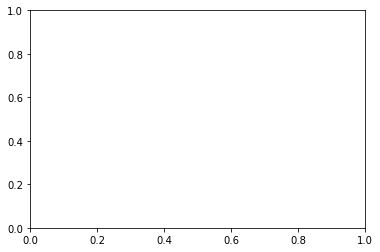

In [378]:
df['roadwork_segmentid']
g = sns.histplot(y=df['roadwork_segmentid'])
# g.set_xlim(left=0, right=5)
